Modified Classification Model

train accuracy: 98.179653
test accuracy: 48.936170
incorrect indices:  [ 0  1  2  5  7  8  9 10 13 15 17 21 23 26 30 33 34 35 36 38 42 44 45 46]


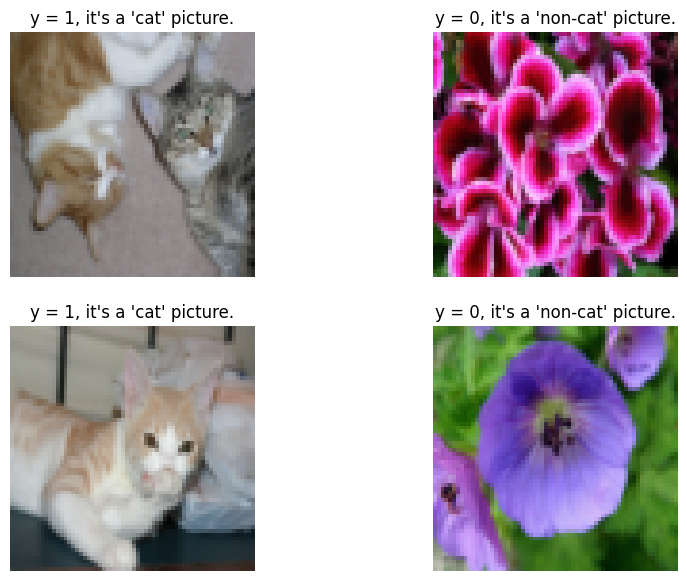

In [1]:
#import libraries
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

#retreive the dataset files
train_dataset = h5py.File('train_catvnoncat.h5', "r")
#test_dataset = h5py.File('test_catvnoncat.h5', "r") no longer needed

#seperate data into train and test data sets
#my ID ends with 2
train_X = np.array(train_dataset["train_set_x"][:162])
train_Y = np.array(train_dataset["train_set_y"][:162])
test_X = np.array(train_dataset["train_set_x"][162:])
test_Y = np.array(train_dataset["train_set_y"][162:])

#get the class of the cat image "cat" or "noncat"
classes = np.array(train_dataset["list_classes"][:])

#reshape
train_Y = train_Y.reshape((1, train_Y.shape[0]))
test_Y  = test_Y.reshape((1, test_Y.shape[0]))

#flatten and normalize the image
train_X_flat = (train_X.reshape(train_X.shape[0], -1)/255).T
test_X_flat = (test_X.reshape(test_X.shape[0], -1)/255).T

#define the sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

#define the propagate function to find the gradients for logistic regression
def propagate(w, b, X, Y):

    m = X.shape[1]

    A = sigmoid(np.dot(w.T,X) + b)

    dw = (np.dot(X,(A-Y).T))/m
    db = (np.sum(A-Y))/m

    return dw, db

#initiate the variables for our train model
X = train_X_flat
Y = train_Y

#set the weight and bias
dim = train_X_flat.shape[0]
w = np.zeros((dim,1))
b = 0
#set the learning rate and number of iterations
num_iterations = 10000
learning_rate = 0.006

#calculate w and b
for i in range(num_iterations):
    dw, db = propagate(w, b, X, Y)


    w = w - (learning_rate*dw)
    b = b - (learning_rate*db)

A = sigmoid(np.dot(w.T,test_X_flat) + b)
#label Y predict_
Y_predict_test = (A >= 0.5) * 1.0
Y_predict_train = sigmoid(np.dot(w.T,X) + b)

#print out the accuracy of our predictions for the dataset
print(f"train accuracy: {(100 - np.mean(np.abs(Y_predict_train - train_Y)) * 100):2f}")
print(f"test accuracy: {(100 - np.mean(np.abs(Y_predict_test - test_Y)) * 100):2f}")

#Now we have to display all incorrect indices and 4 incorrect images from the test set
#get dismatch indices from our predicion and the test set
incorrect_indices = np.where(Y_predict_test != test_Y)[1]

#print the incorrect indices
print("incorrect indices: ", incorrect_indices)

#plot the graph
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2

for i in range(min(4, len(incorrect_indices))):
  fig.add_subplot(rows, columns, i+1)
  plt.imshow(test_X[incorrect_indices[i]])
  plt.axis('off')
  plt.title("y = " + str(test_Y[0, incorrect_indices[i]]) + ", it's a '" + classes[np.squeeze(test_Y[:, incorrect_indices[i]])].decode("utf-8") +  "' picture.")
